In [1]:
import pandas as pd
import numpy as np
from cleantext import clean
import re
from transformers import XLNetTokenizer, XLNetForSequenceClassification, TrainingArguments, Trainer, pipeline
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import datasets 
import evaluate
import random

In [2]:
# 1-Preprocess our Data:

In [3]:
data_train = pd.read_csv('emotion-labels-train.csv') 
data_test = pd.read_csv('emotion-labels-test.csv')
data_val = pd.read_csv('emotion-labels-val.csv')

In [4]:
data_train.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [5]:
data_train.shape

(3613, 2)

In [6]:
data_test.shape

(3142, 2)

In [7]:
data_val.shape

(347, 2)

In [8]:
data = pd.concat([data_train, data_test, data_val], ignore_index=True)

In [9]:
data.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [10]:
data.shape

(7102, 2)

In [11]:
data['text_clean'] = data['text'].apply(lambda x: clean(x, no_emoji=True))

In [12]:
data['text_clean'] = data['text_clean'].apply(lambda x: re.sub('@[^\s]+', '', x))

In [13]:
data.head(20)

,text,label,text_clean
0,Just got back from seeing @GaryDelaney in Burs...,joy,just got back from seeing in burslem. amazing...
1,Oh dear an evening of absolute hilarity I don'...,joy,oh dear an evening of absolute hilarity i don'...
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy,been waiting all week for this game #cheer #fr...
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy,": thank you so much, gloria! you're so sweet,..."
4,I feel so blessed to work with the family that...,joy,i feel so blessed to work with the family that...
5,"Today I reached 1000 subscribers on YT!! , #go...",joy,"today i reached 1000 subscribers on yt!! , #go..."
6,"@Singaholic121 Good morning, love! Happy first...",joy,"good morning, love! happy first day of fall. ..."
7,#BridgetJonesBaby is the best thing I've seen ...,joy,#bridgetjonesbaby is the best thing i've seen ...
8,Just got back from seeing @GaryDelaney in Burs...,joy,just got back from seeing in burslem. amazing...
9,@IndyMN I thought the holidays could not get a...,joy,i thought the holidays could not get any more...


<Axes: xlabel='label'>

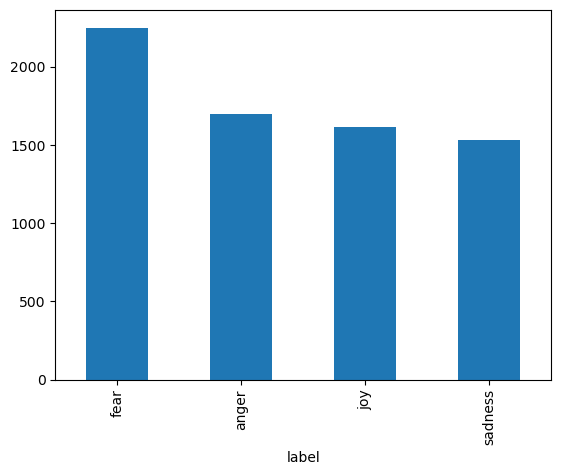

In [14]:
data['label'].value_counts().plot(kind="bar")

In [15]:
g = data.groupby('label')
data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

C:\Users\fares\AppData\Local\Temp\ipykernel_9472\2135407547.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))


In [16]:
data.head(20)

text  label  \
label                                                                
anger 0   As your own lives in order to complete our ama...  anger   
      1            @tttinplay nice. why are u fuming then 😂  anger   
      2   @Casper10666 I assure you there is no laughter...  anger   
      3   When you forget to mention you were bought dre...  anger   
      4   Kik to trade, have fun or a conversation  (kik...  anger   
      5   Gotta wonder why Caller Max listens to the sho...  anger   
      6                         @pianimadi regarde tes snap  anger   
      7            someone kik me @ montanashay_ \n #kikme   anger   
      8                                 My blood is boiling  anger   
      9   @Bungie spent over 2 fucking hours and still c...  anger   
      10  as someone that's struggled w EDs since i was ...  anger   
      11  If you let a general tweet offend you, you def...  anger   
      12  @dreamsandpocky Like, despite all my irritatio...  anger   
      13  What's with all pre industrial revolution-esqu...  anger   
      14          @AdamSinger bubble implies it will burst?  anger   
      15  when you think you've got it together for a da...  anger   
      16  After becoming boiling hot, after slowly melti...  anger   
      17       Drop Snapchat names #bored #snap #swap #pics  anger   
      18  @iamsrk what's up w the gender bias? #indignan...  anger   
      19  @LonelyGoomba I wouldn't bring this up if I we...  anger   

                                                 text_clean  
label                                                        
anger 0   as your own lives in order to complete our ama...  
      1                         nice. why are u fuming then  
      2    i assure you there is no laughter, but increa...  
      3   when you forget to mention you were bought dre...  
      4   kik to trade, have fun or a conversation (kik:...  
      5   gotta wonder why caller max listens to the sho...  
      6                                    regarde tes snap  
      7               someone kik me @ montanashay_\n#kikme  
      8                                 my blood is boiling  
      9    spent over 2 fucking hours and still can't ge...  
      10  as someone that's struggled w eds since i was ...  
      11  if you let a general tweet offend you, you def...  
      12   like, despite all my irritation towards ur sh...  
      13  what's with all pre industrial revolution-esqu...  
      14                      bubble implies it will burst?  
      15  when you think you've got it together for a da...  
      16  after becoming boiling hot, after slowly melti...  
      17       drop snapchat names #bored #snap #swap #pics  
      18   what's up w the gender bias? #indignant this ...  
      19   i wouldn't bring this up if i were you. it's ...

<Axes: xlabel='label'>

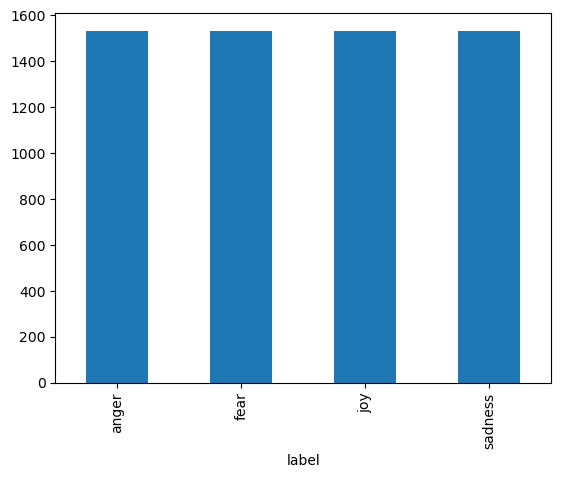

In [17]:
data['label'].value_counts().plot(kind="bar")

In [18]:
data['label_int'] = LabelEncoder().fit_transform(data['label'])

In [19]:
NUM_LABELS = 4

In [20]:
train_split, test_split = train_test_split(data, train_size = 0.8)
train_split, val_split = train_test_split(train_split, train_size = 0.9)

In [21]:
print(len(train_split))
print(len(test_split))
print(len(val_split))

4414
1227
491


In [22]:
train_df = pd.DataFrame({
    "label": train_split.label_int.values,
    "text": train_split.text_clean.values
})

test_df = pd.DataFrame({
    "label": test_split.label_int.values,
    "text": test_split.text_clean.values
})

In [23]:
train_df = datasets.Dataset.from_dict(train_df)
test_df = datasets.Dataset.from_dict(test_df)

In [24]:
dataset_dict = datasets.DatasetDict({"train":train_df, "test":test_df})

In [25]:
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 4414
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 1227
    })
})

In [26]:
# 2-Create embeddings :

In [27]:
tokenizer = XLNetTokenizer.from_pretrained("xlnet-base-cased")

In [28]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding = "max_length", max_length = 128, truncation=True)

In [29]:
tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

Map:   0%|          | 0/4414 [00:00<?, ? examples/s]

Map:   0%|          | 0/1227 [00:00<?, ? examples/s]

In [30]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 4414
    })
    test: Dataset({
        features: ['label', 'text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1227
    })
})

In [31]:
print(tokenized_datasets['train']['text'][0])

 sweden win + finland win, or na win + finland win, na win + russia win + timebreakers shake down right


In [32]:
print(tokenized_datasets['train']['input_ids'][0])

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 17, 23, 1603, 1426, 521, 12677, 17, 4097, 729, 521, 19, 49, 17, 597, 521, 12677, 17, 4097, 729, 521, 19, 17, 597, 521, 12677, 17, 7488, 7192, 521, 12677, 92, 18591, 23, 5604, 151, 203, 4, 3]


In [33]:
tokenizer.decode(5)

'<pad>'

In [38]:
print(tokenized_datasets['train']['token_type_ids'][0])

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]


In [39]:
print(tokenized_datasets['train']['attention_mask'][0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [40]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(100))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(100))

In [41]:
# 3-Fine tune our model:

In [42]:
model = XLNetForSequenceClassification.from_pretrained('xlnet-base-cased', 
                                                       num_labels=NUM_LABELS, 
                                                       id2label={0: 'anger', 1: 'fear', 2: 'joy', 3: 'sadness'})

Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['logits_proj.bias', 'logits_proj.weight', 'sequence_summary.summary.bias', 'sequence_summary.summary.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [43]:
metric = evaluate.load("accuracy")

In [44]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [45]:
training_args = TrainingArguments(output_dir="test_trainer", eval_strategy="epoch", num_train_epochs=3)

In [46]:
trainer = Trainer(
    model=model, 
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics)

In [47]:
trainer.train()

C:\Users\fares\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss



KeyboardInterrupt



In [ ]:
# 4-Evaluate model:

In [45]:
trainer.evaluate()

C:\Users\fares\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


{'eval_loss': 1.4144595861434937,
 'eval_accuracy': 0.22,
 'eval_runtime': 60.8658,
 'eval_samples_per_second': 1.643,
 'eval_steps_per_second': 0.214,
 'epoch': 3.0}

In [46]:
model.save_pretrained("fine_tuned_model")

In [47]:
fine_tuned_model = XLNetForSequenceClassification.from_pretrained("fine_tuned_model")

In [48]:
clf = pipeline("text-classification", fine_tuned_model, tokenizer=tokenizer)

Device set to use cpu


In [59]:
print(val_split['text_clean'][49])

fun pizza night last night performerscol crew gorgeou bunch newbi ❤️ live excit 💪🏼


C:\Users\fares\AppData\Local\Temp\ipykernel_11456\3819617973.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(val_split['text_clean'][49])


In [60]:
#rand_int = random.randint(0, len(val_split))
#print(val_split['text_clean'][rand_int])
answer = clf(val_split['text_clean'][49], top_k=None)
print(answer)

C:\Users\fares\AppData\Local\Temp\ipykernel_11456\3619014206.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  answer = clf(val_split['text_clean'][49], top_k=None)


[{'label': 'joy', 'score': 0.3198889195919037}, {'label': 'fear', 'score': 0.26164644956588745}, {'label': 'anger', 'score': 0.20968976616859436}, {'label': 'sadness', 'score': 0.20877480506896973}]
